# Linear Regression - Gradient Descent

Gradient Descent is a very generic optimization algorithm capable of finding optimal
solutions to a wide range of problems. The general idea of Gradient Descent is to
tweak parameters iteratively in order to minimize a cost function.


When using Gradient Descent, you should ensure that all features
have a similar scale (e.g., using Scikit-Learn’s StandardScaler
class), or else it will take much longer to converge.


### Gradient vector of the cost function

<img src="batch_gradient_descent.JPG">

Notice that this formula involves calculations over the full training
set X, at each Gradient Descent step! This is why the algorithm is
called Batch Gradient Descent: it uses the whole batch of training
data at every step. As a result it is terribly slow on very large train‐
ing sets (but we will see much faster Gradient Descent algorithms
shortly). However, Gradient Descent scales well with the number of
features; training a Linear Regression model when there are hun‐
dreds of thousands of features is much faster using Gradient
Descent than using the Normal Equation.


### Genarate Dataset

In [6]:
#Generate a random Dataset
import numpy as np
X = 4*np.random.rand(100,1)
y = 4*2+X+np.random.rand(100,1)

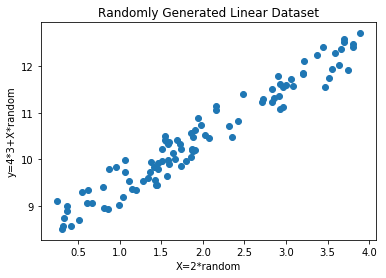

In [8]:
#Plot the scatter plot of the data
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.title("Randomly Generated Linear Dataset")
plt.xlabel("X=2*random")
plt.ylabel("y=4*3+X*random")
plt.show()

# Implement Batch Gradient Descent

In [11]:
#Add x0 to each instance
X_b = np.c_[np.ones((100,1)),X]

In [47]:
def gradient_descent(n_iteration,theta,m,X_b,X_new_b,alpha):
    
    for iteration in range(n_iterations):
        
        #calculate gradients
        gradient = 2/m * X_b.T.dot(X_b.dot(theta)-y)
        theta = theta - alpha*gradient
        #Moving to the minima 

        if iteration%20==0:
            
            #Plot the line 

            y_pred = X_new_b.dot(theta) 
            #Lets Plot this prediction
            plt.plot(X_new,y_pred,"r-")
            plt.plot(X,y,"b.")

 
    plt.axis([0, 2, 6, 15])
    plt.title("alpha={} Theta={}".format(alpha,theta))
    plt.xlabel("X")
    plt.ylabel("y")
    plt.show()
    return theta

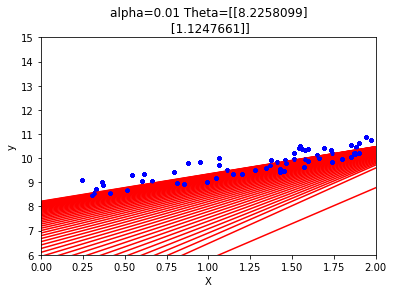

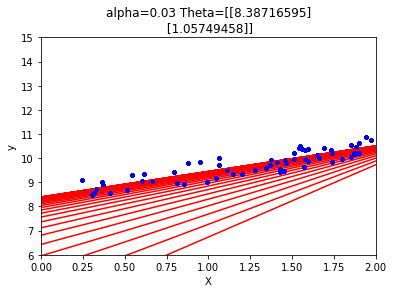

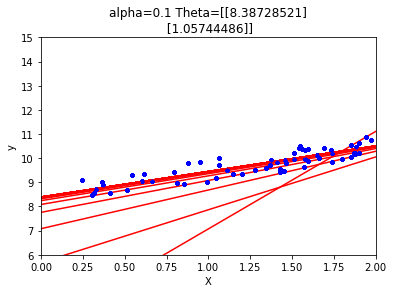

array([[8.38728521],
       [1.05744486]])

In [48]:
n_iterations = 1000                #Number of iterations
m = 100

theta = np.random.randn(2,1)       #Random Initialisation

X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]

#Gradient Descent
gradient_descent(n_iterations,theta,m,X_b,X_new_b,alpha=0.01)
gradient_descent(n_iterations,theta,m,X_b,X_new_b,alpha=0.03)
gradient_descent(n_iterations,theta,m,X_b,X_new_b,alpha=0.1)

#### Learning Rate
To find a good learning rate, you can use grid search (see Chapter 2). However, you
may want to limit the number of iterations so that grid search can eliminate models
that take too long to converge.

#### Number of Iteration
 how to set the number of iterations. If it is too low, you will still be
far away from the optimal solution when the algorithm stops, but if it is too high, you
will waste time while the model parameters do not change anymore. A simple solution is to set a very large number of iterations but to interrupt the algorithm when the
gradient vector becomes tiny—that is, when its norm becomes smaller than a tiny
number ϵ (called the tolerance)—because this happens when Gradient Descent has
(almost) reached the minimum.

#### Convergence Rate
When the cost function is convex and its slope does not change abruptly (as is the
case for the MSE cost function), it can be shown that Batch Gradient Descent with a
fixed learning rate has a convergence rate of O(1/iterations) . In other words, if you divide
the tolerance ϵ by 10 (to have a more precise solution), then the algorithm will have
to run about 10 times more iterations.


## Stochastic Gradient Descent

The main problem with Batch Gradient Descent is the fact that it uses the whole
training set to compute the gradients at every step, which makes it very slow when
the training set is large. At the opposite extreme, Stochastic Gradient Descent just
picks a random instance in the training set at every step and computes the gradients
based only on that single instance. 

On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much
less regular than Batch Gradient Descent: instead of gently decreasing until it reaches
the minimum, the cost function will bounce up and down, decreasing only on aver‐
age. Over time it will end up very close to the minimum, but once it gets there it will
continue to bounce around, never settling down (see Figure 4-9). So once the algo‐
rithm stops, the final parameter values are good, but not optimal.

### simulated annealing


Randomness is good to escape from local optima, but bad because it means
that the algorithm can never settle at the minimum. One solution to this dilemma is
to gradually reduce the learning rate. The steps start out large (which helps make
quick progress and escape local minima), then get smaller and smaller, allowing the
algorithm to settle at the global minimum. This process is called simulated annealing,
because it resembles the process of annealing in metallurgy where molten metal is
slowly cooled down. 

 If the learning rate is reduced too quickly, you may get
stuck in a local minimum, or even end up frozen halfway to the minimum. If the
learning rate is reduced too slowly, you may jump around the minimum for a long
time and end up with a suboptimal solution if you halt training too early

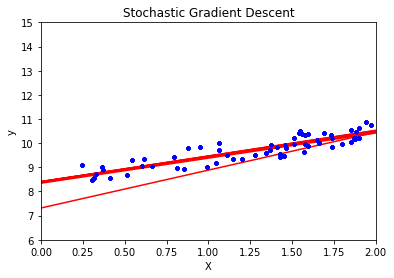

In [68]:
n_epochs = 50

t0,t1 = 5,50 #Learing Rate Hyperparameter

def learning_schedule(t):
    return t0 / (t + t1)

#Randomly initialise the Parameter
theta = np.random.randn(2,1) 
for epoch in range(n_epochs):
    
    X_new = np.array([[0],[2]])
    X_new_b = np.c_[np.ones((2,1)),X_new]

    for i in range(m):
        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        
        gradient =  2 * xi.T.dot(xi.dot(theta) - yi)
        alpha = learning_schedule(epoch * m + i)
        theta = theta - alpha*gradient
        
    if epoch%5==0:   
        #Plot the curve
        #Plot the line 

        y_pred = X_new_b.dot(theta) 
        #Lets Plot this prediction
        plt.plot(X_new,y_pred,"r-")
        plt.plot(X,y,"b.")
        
plt.axis([0, 2, 6, 15])
plt.title("Stochastic Gradient Descent")
plt.xlabel("X")
plt.ylabel("y")
plt.show()
        

In [61]:
theta

array([[8.39497996],
       [1.04759635]])

### Perform SGD using sklearn

In [72]:
#import
from sklearn.linear_model import SGDRegressor
#Initailising classifier

sgd_clf= SGDRegressor( eta0=0.1)

#Fitting the model
sgd_clf.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [76]:
 sgd_clf.intercept_

array([8.37488047])

In [78]:
sgd_clf.coef_

array([1.04848409])

## Mini-batch Gradient Descent


Instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Minibatch GD computes the gradients on small random sets of instances called minibatches. The main advantage of Mini-batch GD over Stochastic GD is that you can
get a performance boost from hardware optimization of matrix operations, especially
when using GPUs.

 The main advantage of Mini-batch GD over Stochastic GD is that you can
get a performance boost from hardware optimization of matrix operations, especially
when using GPUs.

### Comparison of Algorithms for Linear Regression

<img src="comparison1.JPG">
<img src="comparison2.JPG">